# 0. Loading packages

Uncomment cell below if not all necessary packages are installed

In [27]:
#%pip install numpy
#%pip install matplotlib
#%pip install pandas
#%pip install seaborn
#%pip install scikit-learn
#%pip install missingno
#%pip install imblearn

In [28]:
import self_functions as sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 1. Loading data

In [29]:
train_data = pd.read_csv('Datasets/train.csv')
test_data = pd.read_csv('Datasets/test.csv')

# 2. Inspecting data

## 2.1 Inspecting missing data

<Axes: >

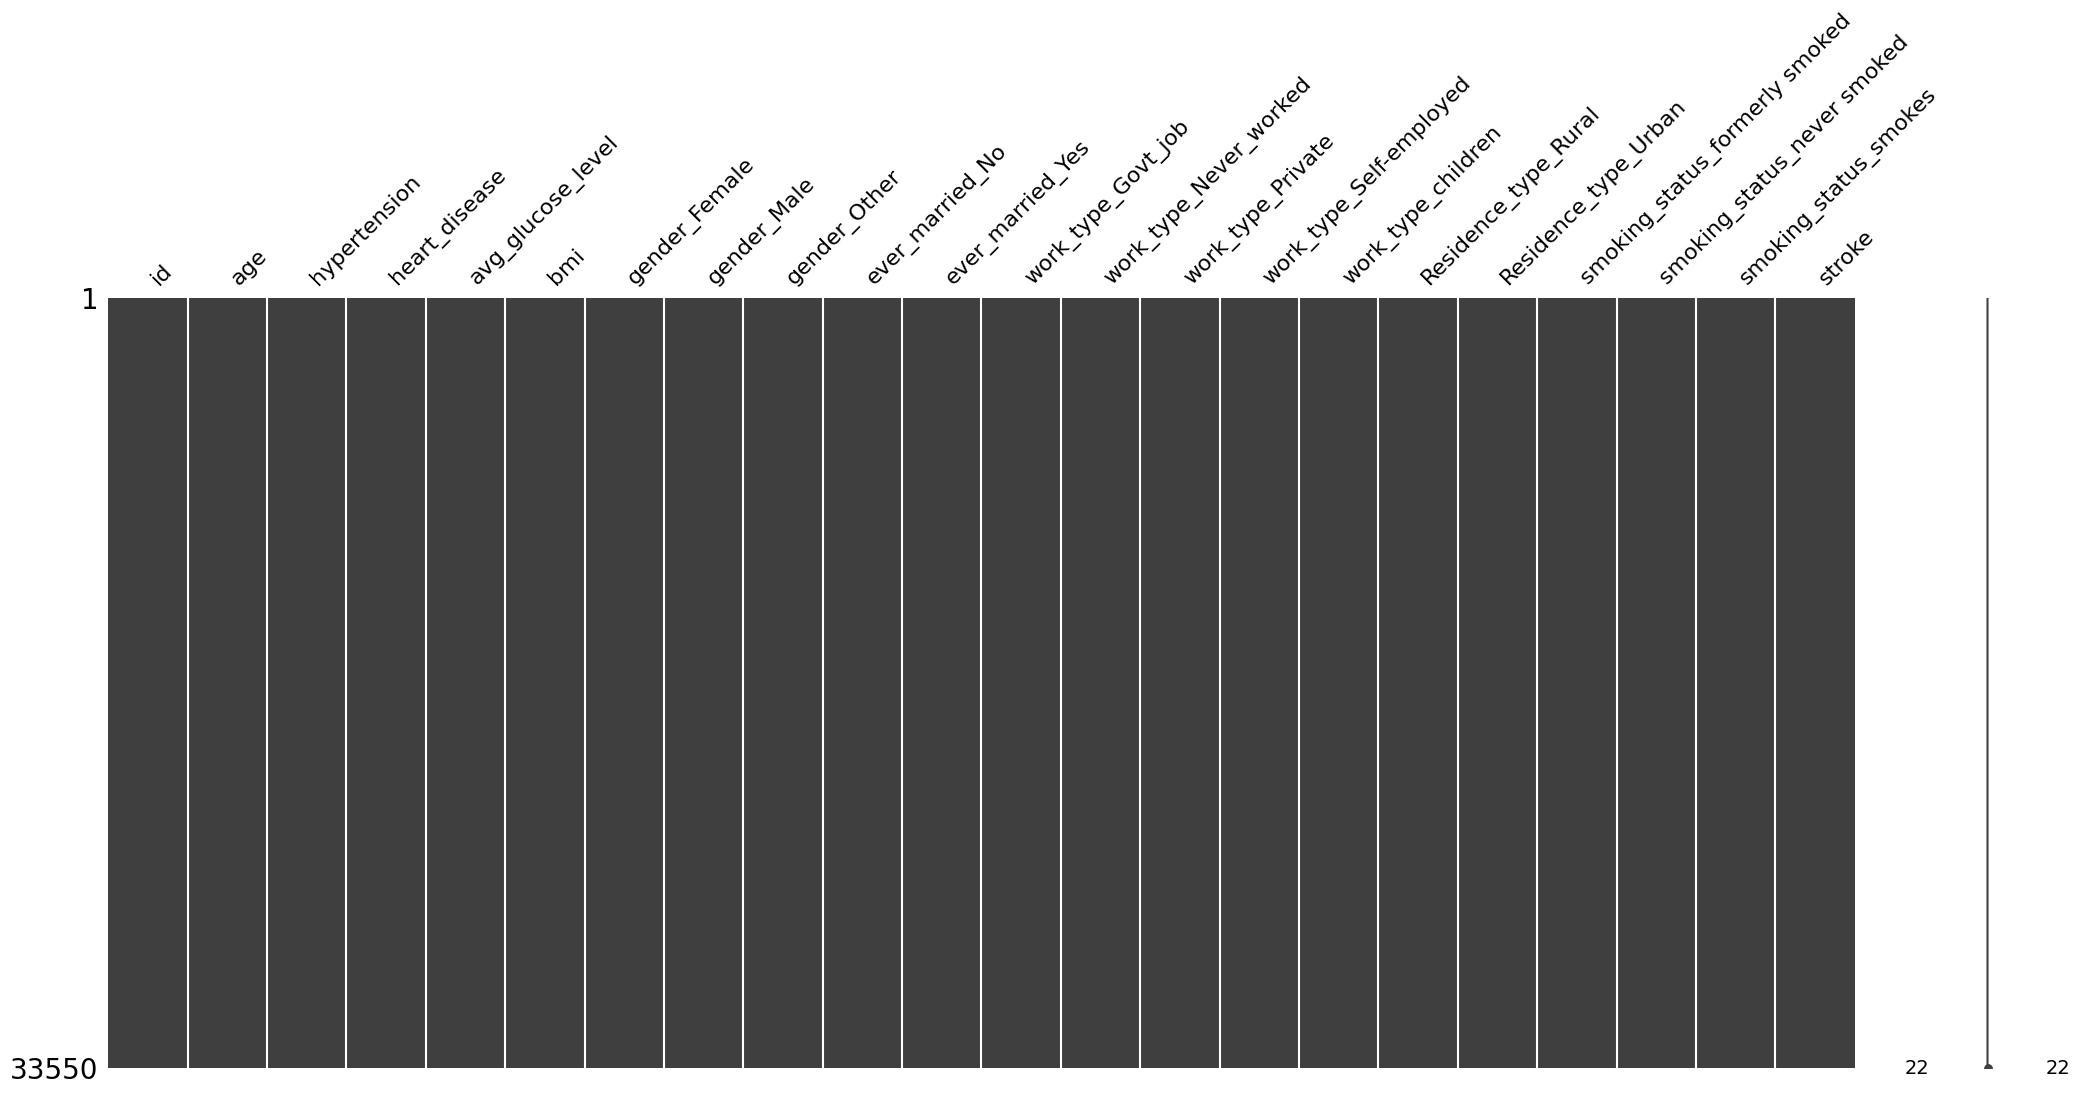

In [30]:
msno.matrix(train_data)

There is no missing data in the train dataset

<Axes: >

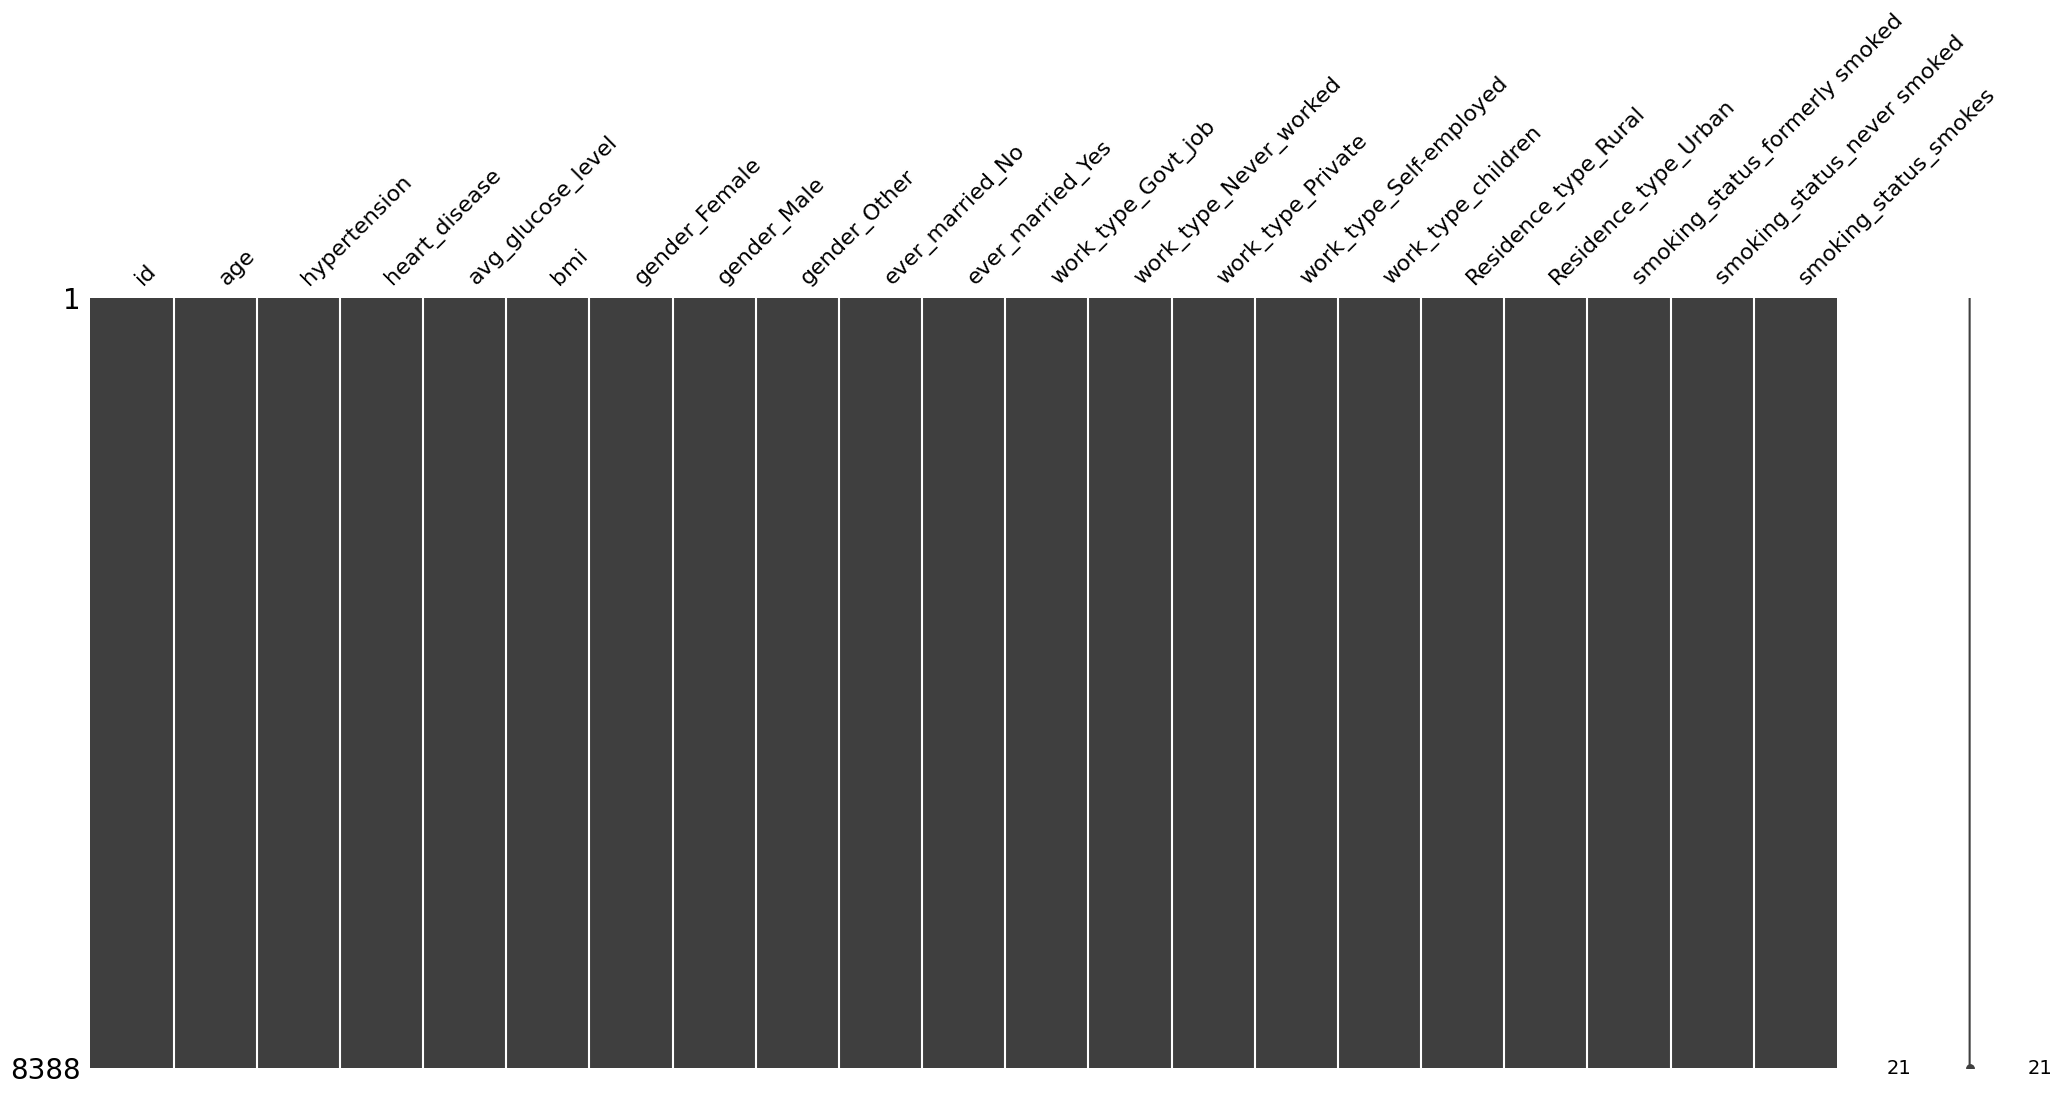

In [31]:
msno.matrix(test_data)

There is no missing data in the test dataset

## 2.2 Inspecting individual columns

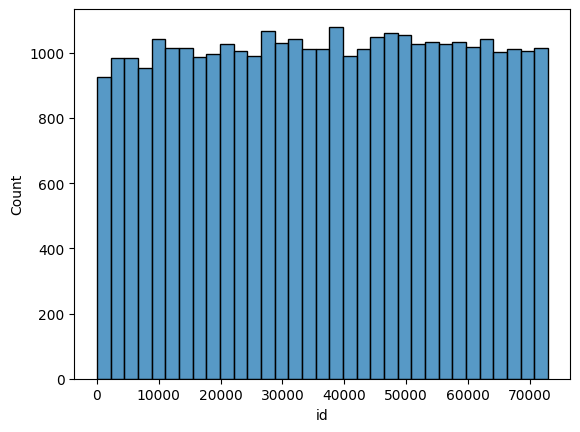

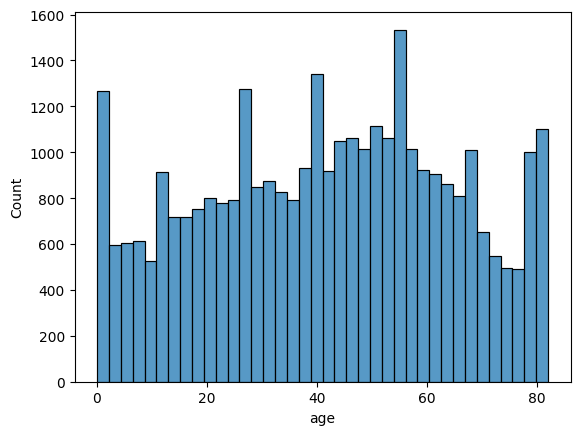

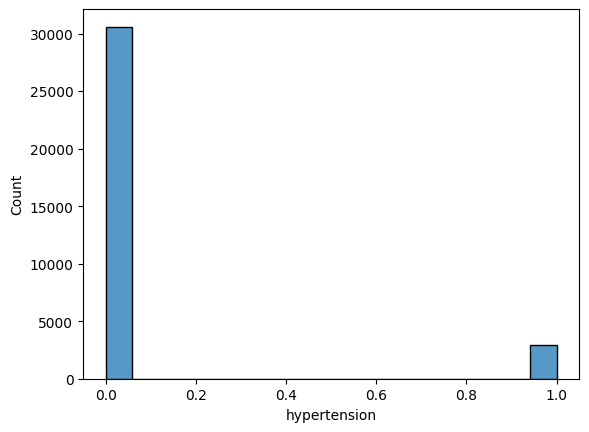

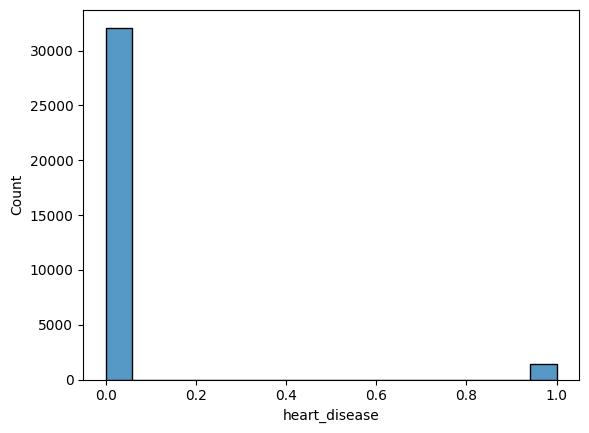

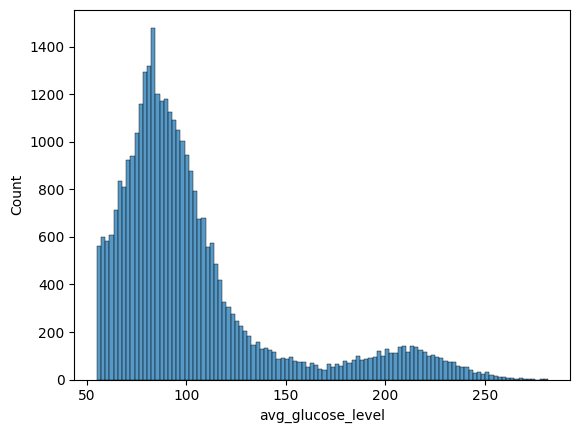

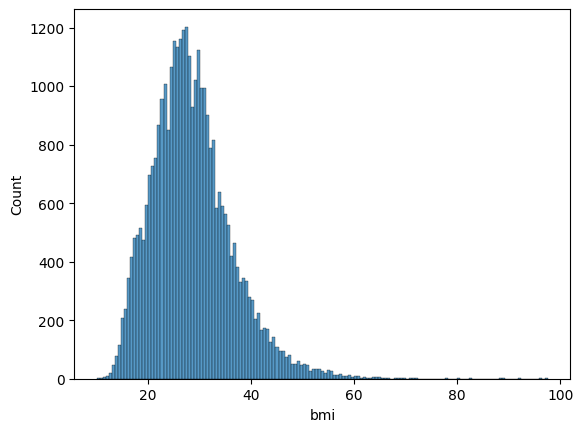

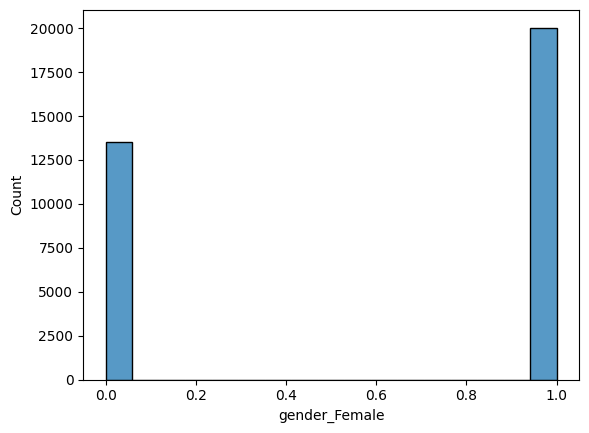

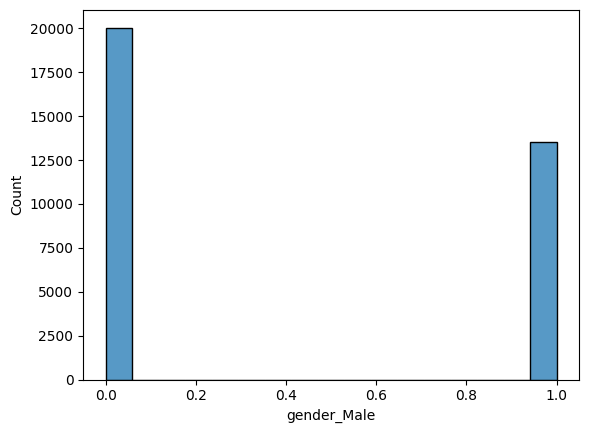

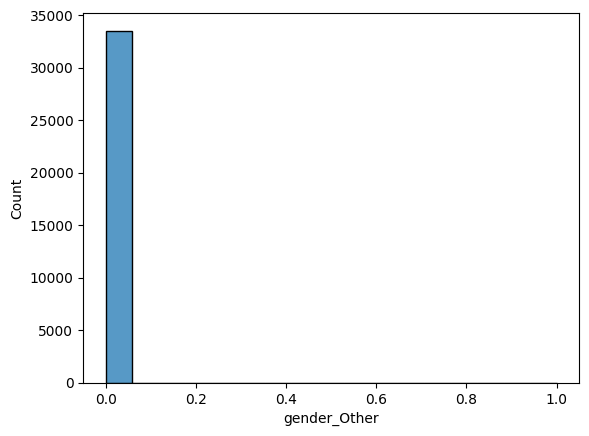

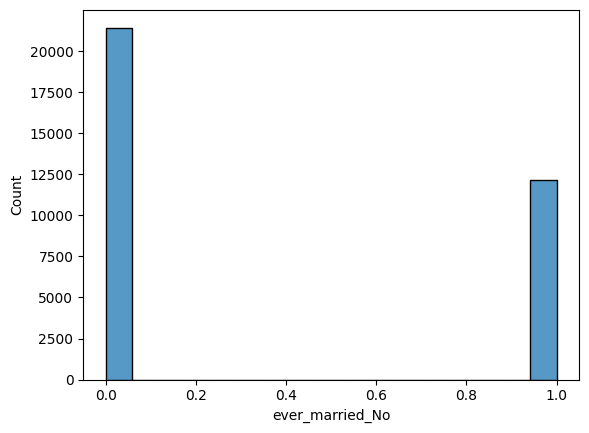

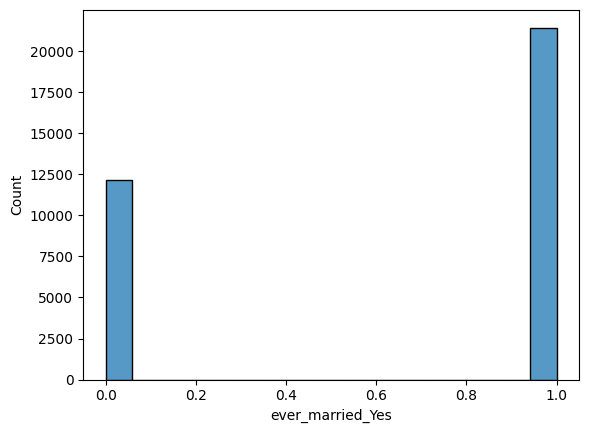

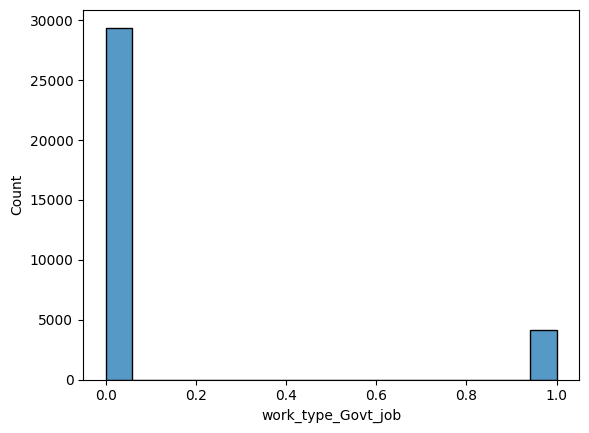

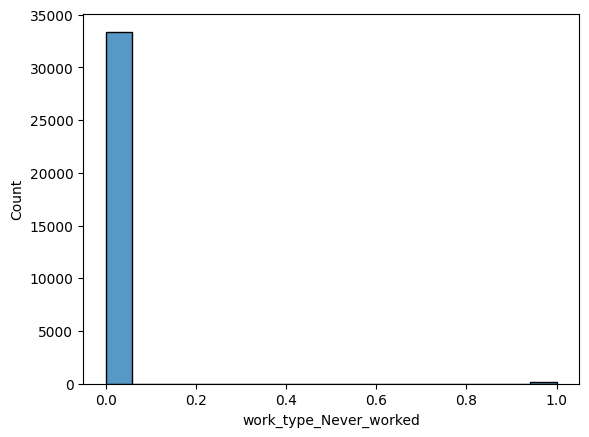

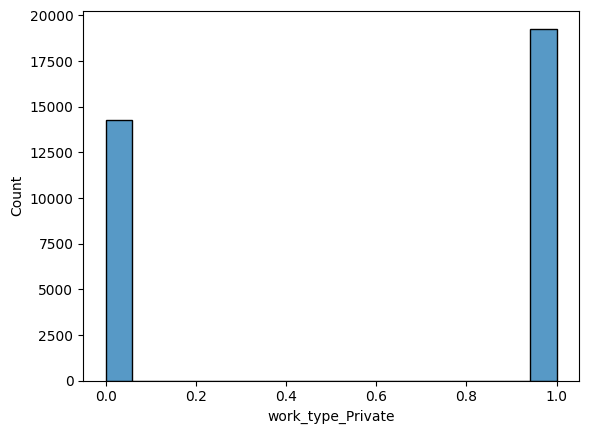

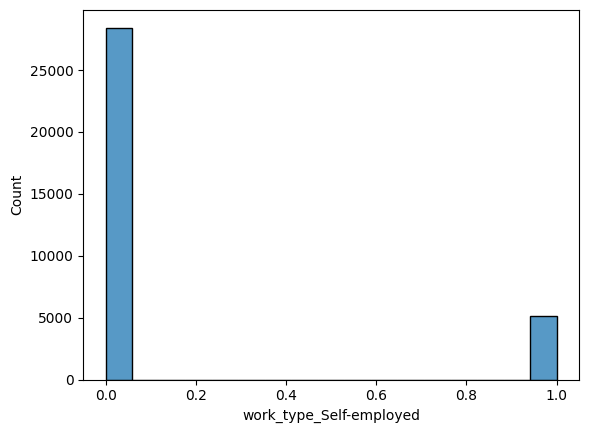

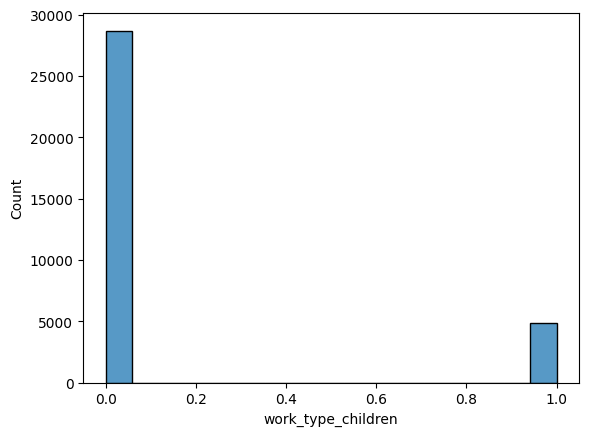

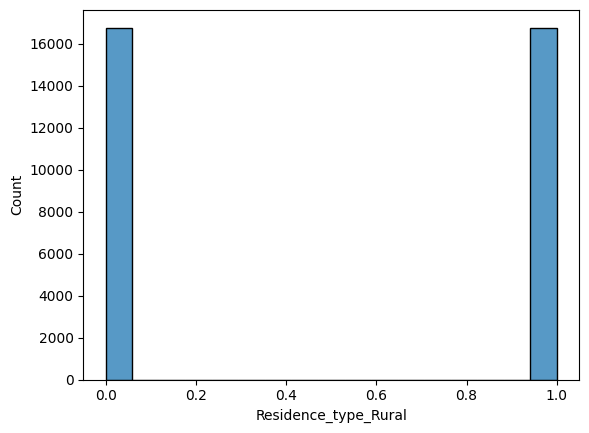

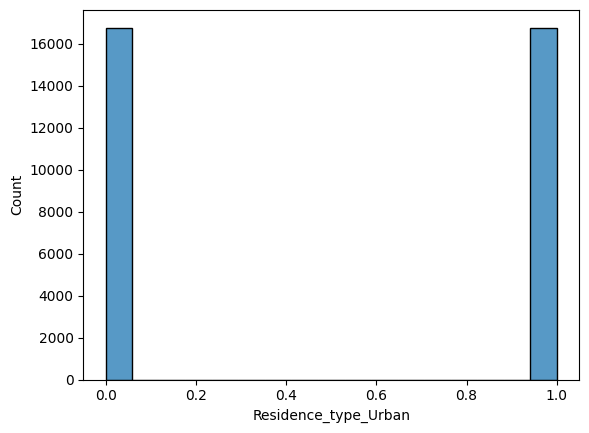

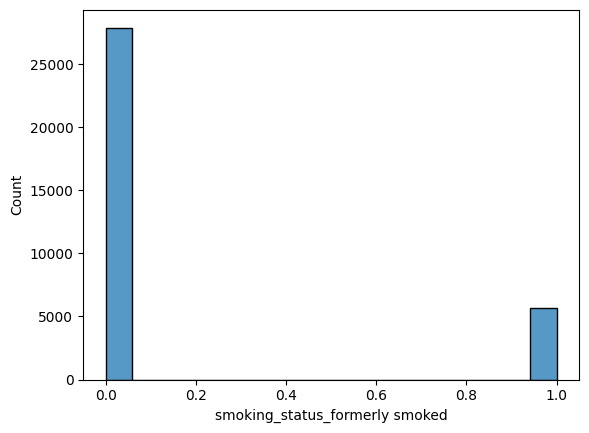

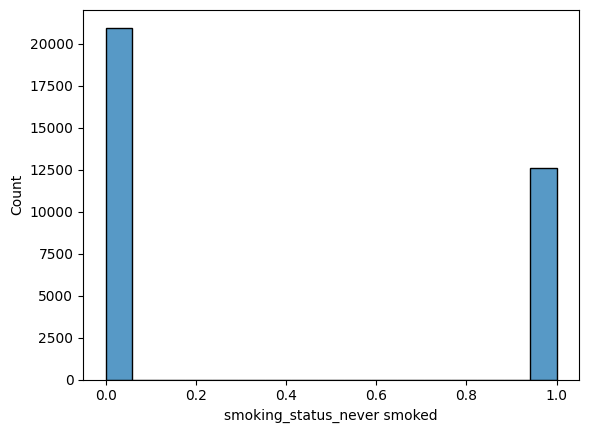

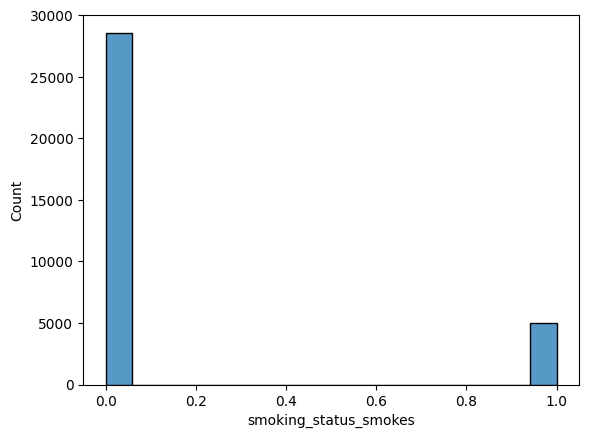

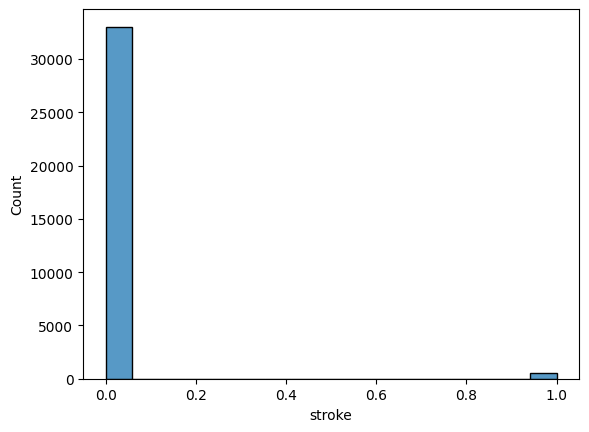

In [32]:
for i in train_data.columns:
    sf.histplot(train_data[i])

There is a low amount of people diagnosed with hypertension and/or heart disease.</br>
The distribution for both the average glucose level and BMI is a right-skewed normal distribution.</br>
There are more women than men in the dataset, there are no people who identify as other in the dataset.</br>
The biggest group of people work at private companies.</br>
There is a 50/50 spread of people living in a rural area vs an urban area.</br>
There is an approximate 50/50 split for people who have ever smoked and people who have never smoked, for the people who have ever smoked it is split 50/50 for active smokers and former smokers.</br>

There is only a low amount of people who have ever had a stroke, which will make it difficult to correctly predict when someone will be having a stroke.

## 2.3 Datatypes

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

## 2.4 Relationships between variables

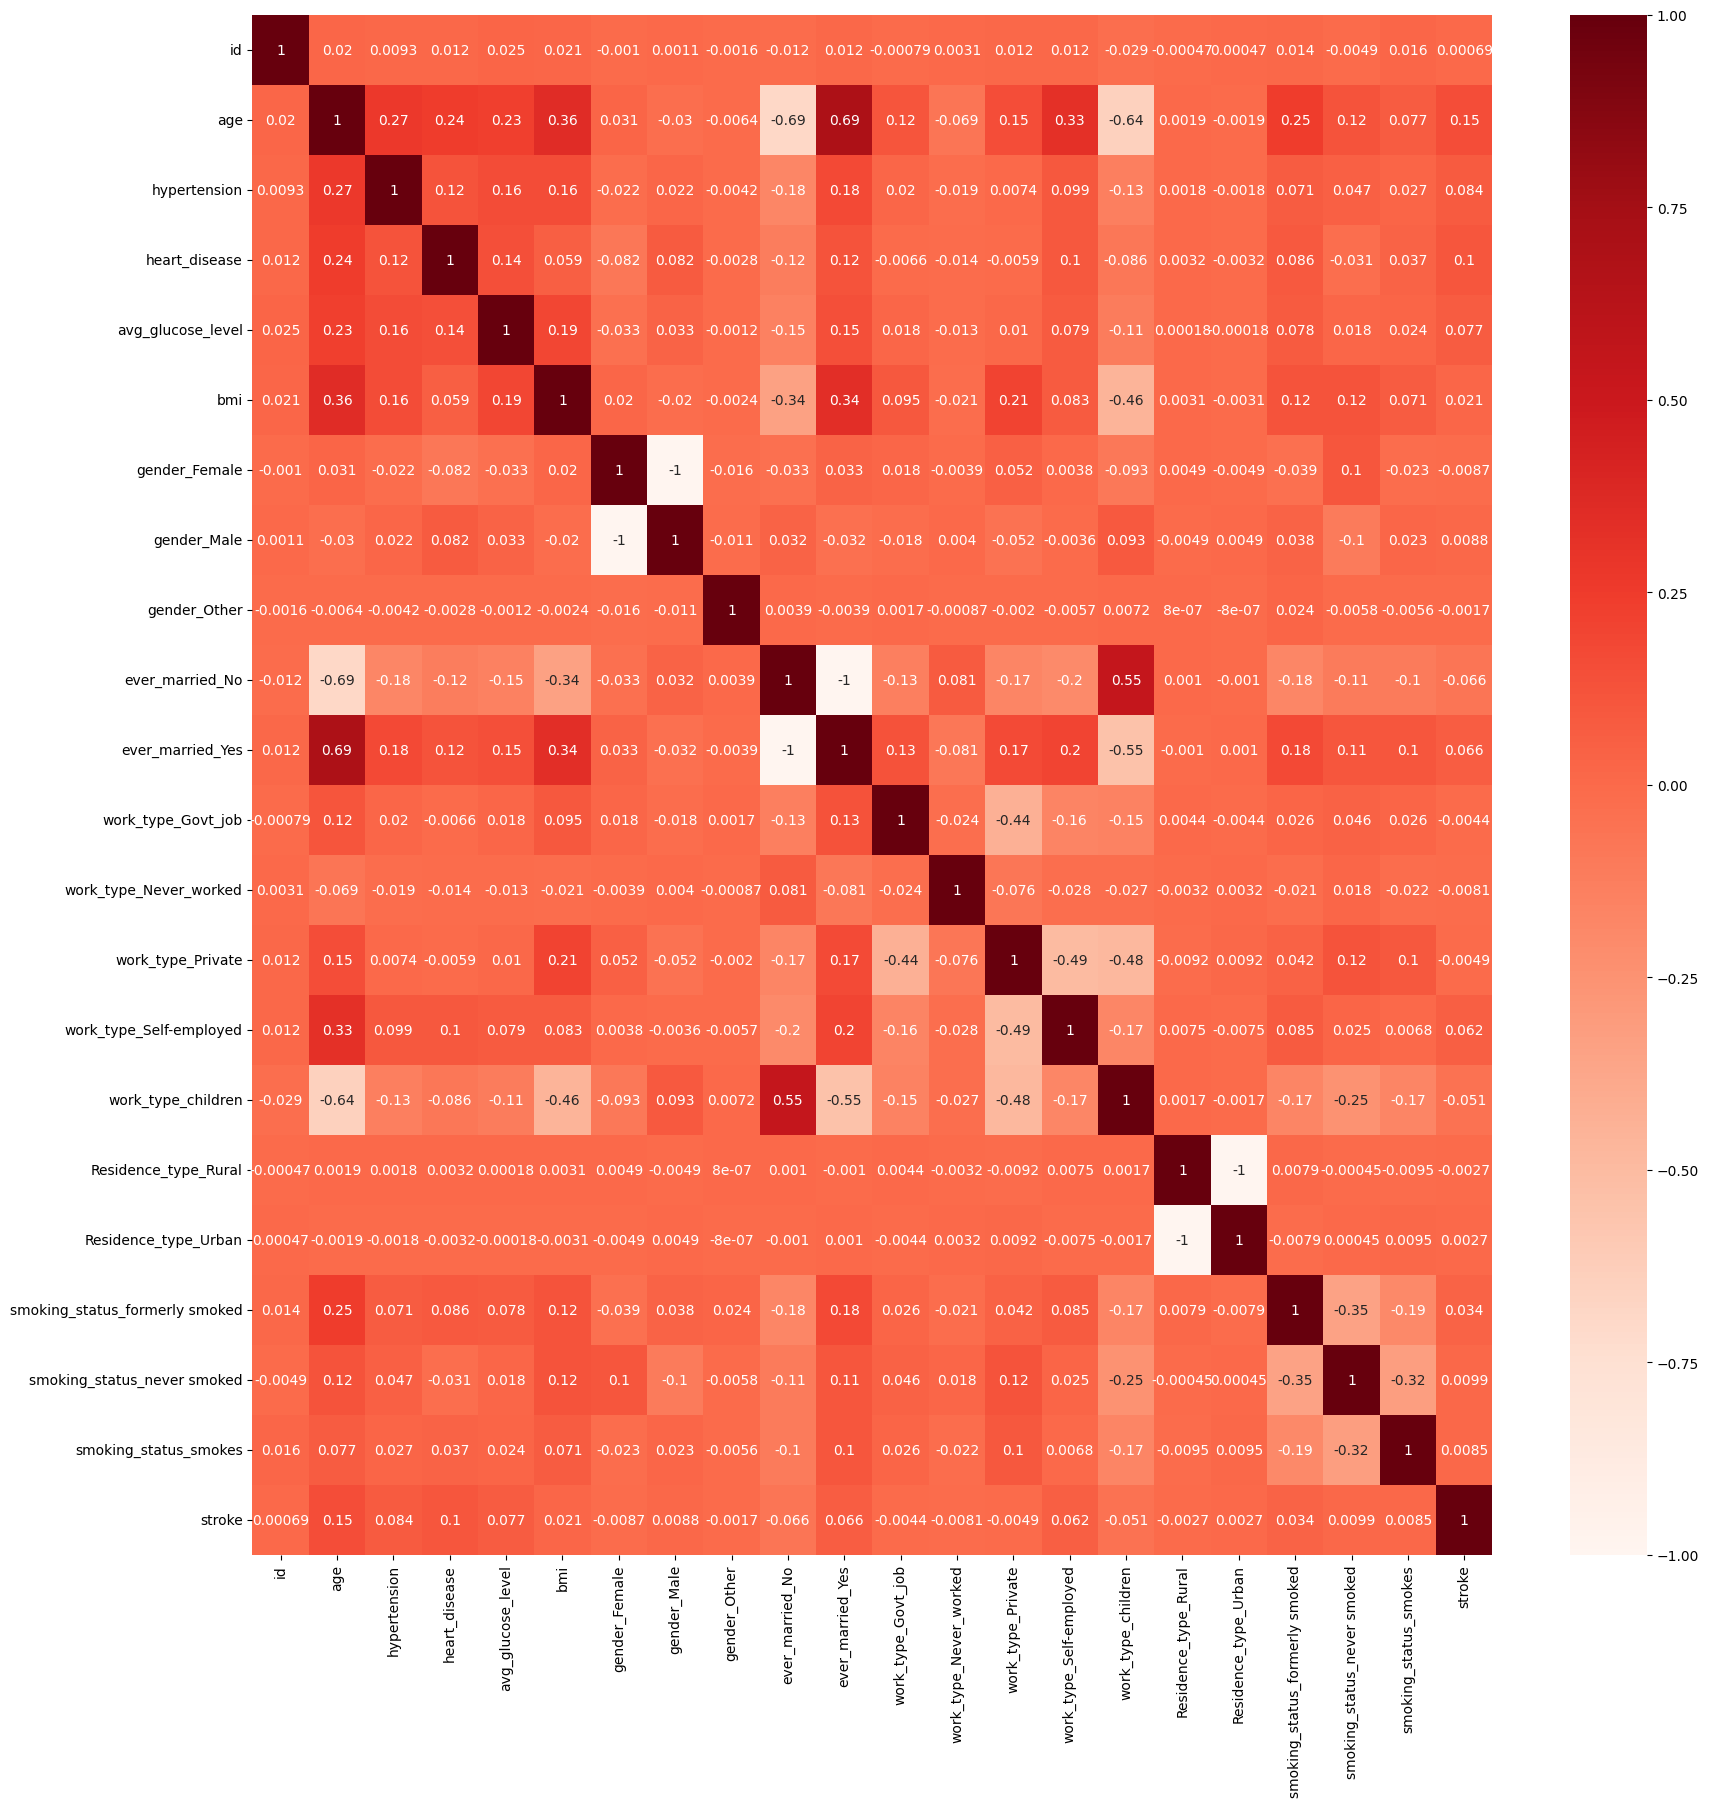

In [34]:
sf.corrplot(train_data)

## 2.5 Minimum requirements for Machine Learning with Scikit Learn

- No missing values: there are no missing values in the dataset which is required for machine learning with Scikit Learn
- Numeric or Boolean values: all columns are in either numeric or Boolean data types which is required for machine learning with Scikit Learn

## 2.6 Conclusion

# 3. Data preparation 

## 3.1 Column selection

In [35]:
col_to_drop = ['gender_Male', 'ever_married_Yes', 'Residence_type_Rural']

train_data = train_data.drop(col_to_drop, axis=1)
test_data = test_data.drop(col_to_drop, axis=1)

These columns were dropped because they had multicollinearity with the partner column

## 3.2 Creating X and y

In [36]:
X_train = train_data.drop('stroke', axis=1)
y_train = train_data['stroke']

## 3.3 Data sampling

Check how many True/False values there are in the train set

In [37]:
y_train.value_counts()

0    33033
1      517
Name: stroke, dtype: int64

In [38]:
smote = SMOTE(sampling_strategy='minority', random_state=0)

X_train, y_train = smote.fit_resample(X_train, y_train)

Check how many True/False values there are in the train set

In [39]:
y_train.value_counts()

0    33033
1    33033
Name: stroke, dtype: int64

## 3.4 Standardizing data

The columns containing data of the float type will be standardized using Scikit Learn's standardscaler. It is important to standardize the data, this prevents columns with high values to have an unreasonably large impact. The way the standarscaler scales is using the standard deviation and the mean to calculate the Z-score

In [40]:
sc = StandardScaler()

sf.sta_sca(sc, X_train, ['age', 'avg_glucose_level', 'bmi'])
sf.sta_sca(sc, test_data, ['age', 'avg_glucose_level', 'bmi'])

# 5. Models

## 5.1 K-Nearest Neighbours

## 5.2 Logistic Regression

## 5.3 SVM

## 5.4 Decision Tree

## 5.5 Ensembles

### 5.5.1 Random Forest

### 5.5.2 Gradient Boosting Classifier

### 5.5.3 XGBoost